In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import re
import sqlite3
import pathlib
import feather
import sys

%matplotlib inline

In [2]:
init_wd=os.getcwd()
print(init_wd)

c:\Users\ham9\rhced\notebook


In [3]:
path=pathlib.Path(init_wd).parents[0].__str__()
if not path in sys.path:
    sys.path.insert(1, path)
os.chdir(path)

In [4]:
from rhced.data_utils import *
from rhced.training import *
from rhced.prediction import *

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
unitcode="sample"
bldg="sample_bldg"

output_path=pathlib.Path().joinpath("outputs",bldg,unitcode)
start_date="2016-01-19"
end_date="2016-01-25"
time_interval=15
max_values={'net_max':10000,'heat_max':2000,'cool_max':2000,'aux_max':6000,'df_max':4000}

In [6]:
df,outputs=unit_prediction(unitcode=unitcode,bldg=bldg,start_date=start_date,end_date=end_date,output_path=output_path,new_training=True,force_update=True,time_interval=time_interval,n_samples=10000,n_training=60000,n_inference=5,max_values=max_values)

C:\Users\ham9\anaconda3\envs\rhced\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


Drop NA data to create training data.
scale const is {'T_out_max': 40.0, 'T_out_min': -20.0, 'T_out_upper': 1.0, 'T_out_lower': -1.0, 'T_in_max': 30.0, 'T_in_min': 10.0, 'T_in_upper': 1.0, 'T_in_lower': -1.0, 'wb_in_max': 30.0, 'wb_in_min': 0.0, 'wb_in_upper': 1.0, 'wb_in_lower': -1.0, 'net_max': 10000, 'net_min': 0.0, 'heat_max': 2000, 'cool_max': 2000, 'df_max': 4000, 'aux_max': 6000}.
New training, so new training and export the trained results.
New training


C:\Users\ham9\anaconda3\envs\rhced\lib\site-packages\theano\gpuarray\dnn.py:192: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn(
WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.


Finished [100%]: Average Loss = -967.32


New training


Finished [100%]: Average Loss = -966.71


New training


Finished [100%]: Average Loss = -966.09


New training


Finished [100%]: Average Loss = -953.14


New training


Finished [100%]: Average Loss = -967.81


During this training, heat1 hours: 29.25,             heat2 hours: 0.0,             df1 hours: 83.0,             df2 hours: 0.0,             cool1 hours: 0.0,             cool2 hours: 0.0,             aux1 hours: 4.75,             fan1 hours: 0.0
So far, heat1 hours: 29.25,             heat2 hours: 0.0,             df1 hours: 83.0,             df2 hours: 0.0,             cool1 hours: 0.0,             cool2 hours: 0.0,             aux1 hours: 4.75,             fan1 hours: 0.0
feather file is created at outputs\sample_bldg\sample\df_2016-01-19_2016-01-25.feather
lower: 62.211211695933976
median: 135.9019795220793
upper: 215.75736472097094
measurement: 126.32639104166667


In [7]:
# #load data without training.
# df_values_path=output_path.joinpath("df_2016-01-19_2016-01-25.feather")
# df=feather.read_dataframe(df_values_path.__str__())


Visualize the results.

In [8]:
df.head(3)

,timestamp,i_hc,i_heat1_all,i_cool1,i_aux1,i_df1,i_heat1,i_fan1,P_hc_lower,P_hc_mid,...,P_aux1_mid,P_aux1_upper,P_aux1_uq,P_aux1_lq,P_fan1_lower,P_fan1_mid,P_fan1_upper,P_fan1_uq,P_fan1_lq,hc
0,2016-01-19 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.394444
1,2016-01-19 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.722222
2,2016-01-19 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.444444


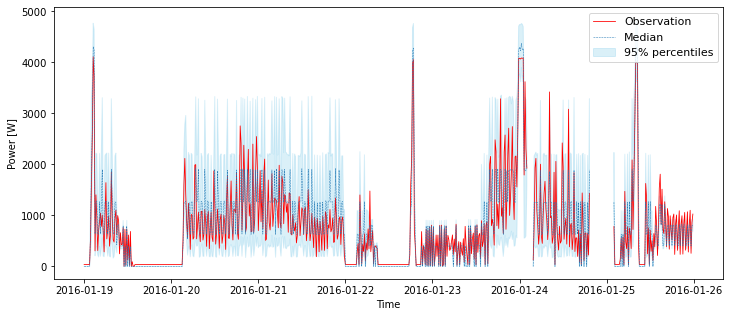

In [9]:
x_time=pd.to_datetime(df['timestamp'])
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(12,5))
ax.plot(x_time,df['hc'],'-',linewidth=0.8,color="red",label="Observation")
ax.fill_between(x=x_time,y1=df['P_hc_lower'],y2=df['P_hc_upper'],alpha=0.3,color="skyblue",label="95% percentiles")
ax.plot(x_time,df['P_hc_mid'],'--',linewidth=0.5,label='Median')
ax.set(ylabel="Power [W]",xlabel="Time")
ax.legend(fontsize=11,loc='upper right')


In [10]:
start_date_="2016-01-26"
end_date_="2016-02-01"

start_date_vector=pd.date_range(start_date_, periods=24, freq='7D')
end_date_vector=pd.date_range(end_date_, periods=24, freq='7D')

for i_start,i_end in zip(start_date_vector,end_date_vector):
    start_date=i_start.strftime("%Y-%m-%d")
    end_date=i_end.strftime("%Y-%m-%d")
    df,outputs=unit_prediction(unitcode=unitcode,bldg=bldg,start_date=start_date,end_date=end_date,output_path=output_path,new_training=False,force_update=False,time_interval=time_interval,n_samples=10000,n_training=60000,n_inference=3)


last_prior_values_path is outputs\sample_bldg\sample\prior_values_2016-01-19_2016-01-25.pickle
last_input_values_path is outputs\sample_bldg\sample\input_values_2016-01-19_2016-01-25.pickle
Model time_interval from previous training output is 15.0 minutes. If not please double check.
Drop NA data to create training data.
scale const is {'T_out_max': 40.0, 'T_out_min': -20.0, 'T_out_upper': 1.0, 'T_out_lower': -1.0, 'T_in_max': 30.0, 'T_in_min': 10.0, 'T_in_upper': 1.0, 'T_in_lower': -1.0, 'wb_in_max': 30.0, 'wb_in_min': 0.0, 'wb_in_upper': 1.0, 'wb_in_lower': -1.0, 'net_max': 10000, 'net_min': 0.0, 'heat_max': 2000, 'cool_max': 2000, 'df_max': 4000, 'aux_max': 6000}.
Posterior prediction only
feather file is created at outputs\sample_bldg\sample\df_2016-01-26_2016-02-01.feather
lower: 75.09484494702993
median: 158.78119703568052
upper: 248.47319884467595
measurement: 153.6213508333333
last_prior_values_path is outputs\sample_bldg\sample\prior_values_2016-01-19_2016-01-25.pickle
last_in

Finished [100%]: Average Loss = -1,381.7


Finished [100%]: Average Loss = -1,383.2


Finished [100%]: Average Loss = -1,381.2


During this training, heat1 hours: 4.25,             heat2 hours: 0.0,             df1 hours: 4.5,             df2 hours: 0.0,             cool1 hours: 11.25,             cool2 hours: 0.0,             aux1 hours: 0.0,             fan1 hours: 0.0
So far, heat1 hours: 33.5,             heat2 hours: 0.0,             df1 hours: 87.5,             df2 hours: 0.0,             cool1 hours: 11.25,             cool2 hours: 0.0,             aux1 hours: 4.75,             fan1 hours: 0.0


c:\Users\ham9\rhced\rhced\training.py:10: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-500*(-x+x0)))


feather file is created at outputs\sample_bldg\sample\df_2016-03-29_2016-04-04.feather
lower: 11.835328740757936
median: 15.77275023417187
upper: 24.362932546392383
measurement: 16.26179611111111
last_prior_values_path is outputs\sample_bldg\sample\prior_values_2016-03-29_2016-04-04.pickle
last_input_values_path is outputs\sample_bldg\sample\input_values_2016-03-29_2016-04-04.pickle
Model time_interval from previous training output is 15.0 minutes. If not please double check.
Drop NA data to create training data.
scale const is {'T_out_max': 40.0, 'T_out_min': -20.0, 'T_out_upper': 1.0, 'T_out_lower': -1.0, 'T_in_max': 30.0, 'T_in_min': 10.0, 'T_in_upper': 1.0, 'T_in_lower': -1.0, 'wb_in_max': 30.0, 'wb_in_min': 0.0, 'wb_in_upper': 1.0, 'wb_in_lower': -1.0, 'net_max': 10000, 'net_min': 0.0, 'heat_max': 2000, 'cool_max': 2000, 'df_max': 4000, 'aux_max': 6000}.
Posterior prediction only
feather file is created at outputs\sample_bldg\sample\df_2016-04-05_2016-04-11.feather
lower: 3.879602

c:\Users\ham9\rhced\rhced\training.py:10: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(-500*(-x+x0)))


Posterior prediction only
feather file is created at outputs\sample_bldg\sample\df_2016-04-26_2016-05-02.feather
lower: 50.436950779926505
median: 62.16469022761572
upper: 72.66923581958643
measurement: 60.60450805555556
last_prior_values_path is outputs\sample_bldg\sample\prior_values_2016-03-29_2016-04-04.pickle
last_input_values_path is outputs\sample_bldg\sample\input_values_2016-03-29_2016-04-04.pickle
Model time_interval from previous training output is 15.0 minutes. If not please double check.
Drop NA data to create training data.
scale const is {'T_out_max': 40.0, 'T_out_min': -20.0, 'T_out_upper': 1.0, 'T_out_lower': -1.0, 'T_in_max': 30.0, 'T_in_min': 10.0, 'T_in_upper': 1.0, 'T_in_lower': -1.0, 'wb_in_max': 30.0, 'wb_in_min': 0.0, 'wb_in_upper': 1.0, 'wb_in_lower': -1.0, 'net_max': 10000, 'net_min': 0.0, 'heat_max': 2000, 'cool_max': 2000, 'df_max': 4000, 'aux_max': 6000}.
Posterior prediction only
feather file is created at outputs\sample_bldg\sample\df_2016-05-03_2016-05-0